In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

## Import Data

In [2]:
with open('../JSON/AllPlayer/final/all_player2018.json', 'r') as loadFile:
    predict_data =  pd.DataFrame(json.load(loadFile))
with open('../JSON/MVP/final_mvp.json', 'r') as loadFile:
    train_data =  pd.DataFrame(json.load(loadFile))

## Finding best features

In [3]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [4]:
train_data.loc[:, 'G':].columns

Index(['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Share'],
      dtype='object')

In [5]:
orig_features = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']

In [6]:
x_data = train_data[orig_features].to_numpy()
y_data = train_data[['Share']].to_numpy()
y_data = y_data.reshape(y_data.shape[0], )

## Using Random forest to check most significant features

In [7]:
regressor = RandomForestRegressor(n_estimators=200)
regressor.fit(x_data, y_data)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [8]:
sorted_indices = np.argsort(regressor.feature_importances_)[::-1]
for index in sorted_indices:
    print(f"{orig_features[index]}: {regressor.feature_importances_[index]}")

OWS: 0.09221528802795544
VORP: 0.07244778911370892
WS: 0.06049762626193843
PER: 0.05518338998110699
FGA: 0.04661967323404122
PF: 0.04350363453603591
WS/48: 0.038908706583428175
MP: 0.03835435861895954
BPM: 0.03529887225933006
2P%: 0.033986166948552096
PTS: 0.0332470112228247
FG: 0.03274796083799354
TOV%: 0.02882888999381918
FTA: 0.02253480663014822
FTr: 0.02035510081717955
FT%: 0.020279411211942912
TS%: 0.01797062781438793
eFG%: 0.017470717829154152
STL%: 0.015574641337498632
DWS: 0.01522016199723623
DRB%: 0.014678286005169423
ORB%: 0.014675576783336317
USG%: 0.014484789709404887
DBPM: 0.013113402918852525
3P%: 0.013042123484049513
3PAr: 0.012999712834476405
STL: 0.012725013218425594
TOV: 0.012361359059051542
OBPM: 0.01208688576636658
DRB: 0.011735294617791082
2P: 0.01148129620819066
TRB: 0.011352041707278191
2PA: 0.010831844335975713
BLK%: 0.01018539920189352
FG%: 0.010107136638487273
TRB%: 0.00913287596742563
AST: 0.008622217785570284
AST%: 0.00802785143210703
3PA: 0.0080219799215245

## Using feature selection

In [9]:
selector = SelectKBest(mutual_info_regression, k=5)
best_feat = selector.fit_transform(x_data, y_data)
sorted_indices = np.argsort(selector.scores_)[::-1]

In [10]:
for index in sorted_indices:
    print(f"{orig_features[index]}: {selector.scores_[index]:.4f}")

STL: 0.1628
WS: 0.1449
VORP: 0.1444
OWS: 0.1406
WS/48: 0.1386
FG: 0.1212
MP: 0.1137
PER: 0.1055
PTS: 0.1053
TS%: 0.0912
OBPM: 0.0880
STL%: 0.0866
BLK%: 0.0658
BPM: 0.0654
FTr: 0.0581
3P: 0.0542
DRB: 0.0532
FT: 0.0501
FT%: 0.0460
USG%: 0.0414
2P%: 0.0376
BLK: 0.0375
TRB%: 0.0372
GS: 0.0369
ORB: 0.0365
2PA: 0.0356
2P: 0.0352
3PAr: 0.0348
DWS: 0.0332
TRB: 0.0326
FGA: 0.0276
TOV: 0.0221
DRB%: 0.0079
ORB%: 0.0076
3P%: 0.0036
eFG%: 0.0000
FTA: 0.0000
AST: 0.0000
PF: 0.0000
3PA: 0.0000
FG%: 0.0000
AST%: 0.0000
TOV%: 0.0000
DBPM: 0.0000
G: 0.0000


## Correlation matrix

In [11]:
data = train_data[orig_features + ["Share"]]
import seaborn as sns

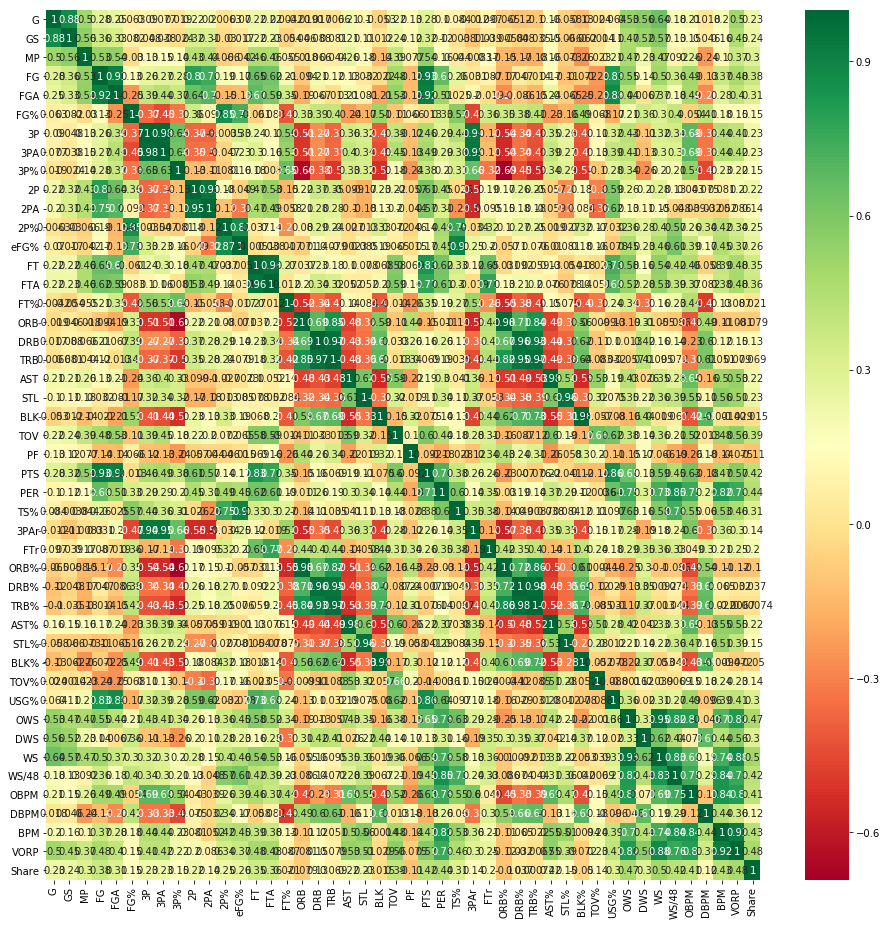

In [12]:
fig = plt.figure(figsize=(16, 16))
fig.set_facecolor('white')
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

In [13]:
features = ['VORP', 'WS', 'STL', 'FG', 'MP', 'OWS','WS/48','PTS', 'PER', 'BLK%']

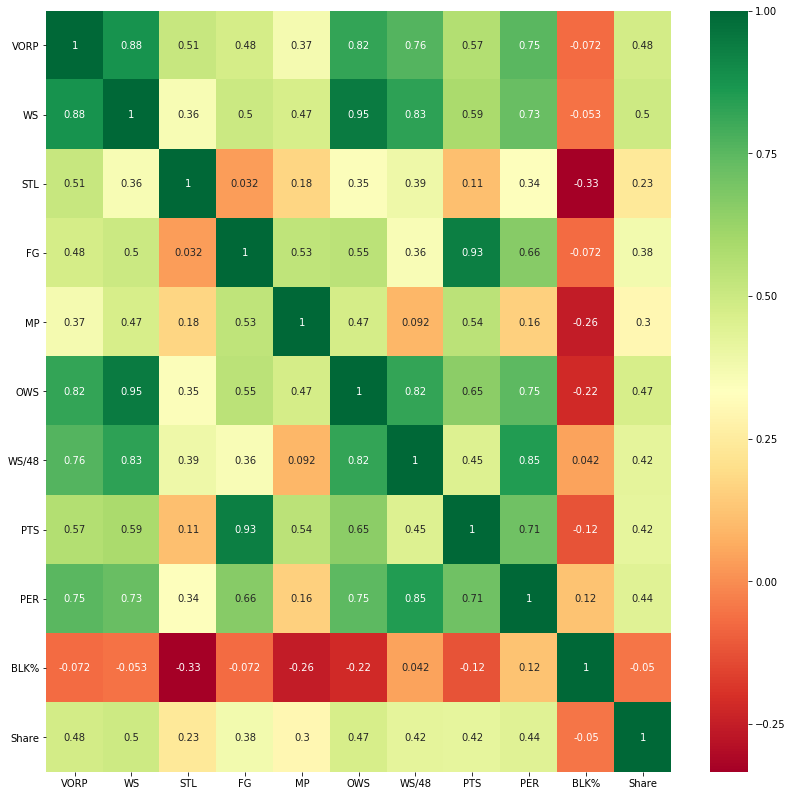

In [14]:
data = train_data[features + ["Share"]]
fig = plt.figure(figsize=(14, 14))

fig.set_facecolor('white')

sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
_ = plt.yticks(rotation='horizontal')

In [15]:
data = train_data[features]
data.head()

,VORP,WS,STL,FG,MP,OWS,WS/48,PTS,PER,BLK%
0,11.6,20.3,1.7,9.7,37.7,13.7,0.318,28.4,31.7,2.4
1,2.8,7.9,1.3,8.9,39.0,5.2,0.132,25.3,20.8,1.4
10,3.2,10.1,1.2,5.2,35.3,7.9,0.174,17.7,18.8,0.5
100,9.8,17.9,2.1,10.2,34.2,13.8,0.318,30.1,31.5,0.4
101,3.2,7.1,1.2,6.4,35.3,4.2,0.121,16.9,18.8,3.4


# Defining the pipeline

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(data, train_data['Share'], test_size=0.3, random_state=0)

In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

In [19]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
preds = model.predict(X_valid)

In [21]:
# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 0.1837675797785548


In [22]:
from sklearn.model_selection import cross_val_score
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(model, X_train, y_train,
                              cv=10,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [0.33723168 0.09692336 0.1453019  0.199555   0.21828444 0.16127137
 0.19874532 0.30512535 0.24104941 0.30013573]


In [23]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
0.22036235864640868


In [24]:
from xgboost import XGBRegressor

XGB_model = XGBRegressor()
XGB_model.fit(X_train, y_train)

[16:57:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ying\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)